# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Load Data

In [2]:
df = pd.read_csv('Data/part4_tmdb_results_all.csv.gz', lineterminator='\n')
df.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63148 entries, 0 to 63147
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   backdrop_path          40883 non-null  object 
 2   belongs_to_collection  4257 non-null   object 
 3   budget                 63126 non-null  float64
 4   genres                 63126 non-null  object 
 5   homepage               15142 non-null  object 
 6   id                     63126 non-null  float64
 7   original_language      63126 non-null  object 
 8   original_title         63126 non-null  object 
 9   overview               61824 non-null  object 
 10  popularity             63126 non-null  float64
 11  poster_path            58195 non-null  object 
 12  production_companies   63126 non-null  object 
 13  production_countries   63126 non-null  object 
 14  release_date           62044 non-null  object 
 15  re

# 3. Clean Data

## 3.1 Check & remove duplicated rows

In [4]:
#check duplicates
df.duplicated().sum()

21

In [5]:
#remove duplicates
df = df.drop_duplicates()

In [6]:
#check that the duplicates have been dropped
df.duplicated().sum()

0

## 3.2 Check for missing values

In [7]:
#check missing values in each column
df.isna().sum()

adult                        1
backdrop_path            22244
belongs_to_collection    58870
budget                       1
genres                       1
homepage                 47985
id                           1
original_language            1
original_title               1
overview                  1303
popularity                   1
poster_path               4932
production_companies         1
production_countries         1
release_date              1083
revenue                      1
runtime                      1
spoken_languages             1
status                       1
tagline                  38981
title                        1
video                        1
vote_average                 1
vote_count                   1
certification            47885
dtype: int64

**Observation**: There are many missing values in `backdrop_path`, `belongs_to_collection`, `homepage`, `tagline`, and `certification` columns.

There are some missing values in `overview`, `poster_path`, and `release_date` columns.

## 3.3 Check for unnecessary columns

In [8]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2244.0,PG


In [9]:
#check what % of the data are missing for each column
df.isna().sum() / df.shape[0]

adult                    0.000016
backdrop_path            0.352369
belongs_to_collection    0.932565
budget                   0.000016
genres                   0.000016
homepage                 0.760134
id                       0.000016
original_language        0.000016
original_title           0.000016
overview                 0.020641
popularity               0.000016
poster_path              0.078128
production_companies     0.000016
production_countries     0.000016
release_date             0.017156
revenue                  0.000016
runtime                  0.000016
spoken_languages         0.000016
status                   0.000016
tagline                  0.617501
title                    0.000016
video                    0.000016
vote_average             0.000016
vote_count               0.000016
certification            0.758550
dtype: float64

In [10]:
#check the number of unique values in each column
df.nunique()

adult                        2
backdrop_path            40879
belongs_to_collection     2210
budget                    1660
genres                    3944
homepage                 14983
id                       63126
original_language          125
original_title           60339
overview                 61793
popularity               14308
poster_path              58192
production_companies     34910
production_countries      3430
release_date              7829
revenue                   7598
runtime                    240
spoken_languages          2672
status                       3
tagline                  23819
title                    57861
video                        2
vote_average              3518
vote_count                3059
certification               12
dtype: int64

In [11]:
#Display data under this column to determine whether to keep this column or not
#df['belongs_to_collection'].value_counts()

In [12]:
#Display data under this column to determine whether to keep this column or not
#df['homepage'].value_counts()

In [13]:
#Display data under this column to determine whether to keep this column or not
#df['tagline'].value_counts()

**Columns to be dropped due to too many missing data:**
- `backdrop_path` 
   - Reason: More than 35% of the data is missing, and this data does not look useful for hypothesis testing.
- `homepage`
   - Reason: More than 76% of the data is missing, and I will not use this data for hypothesis testing.
   
**Columns to be dropped due to too many unique values:**
- `poster_path`
   - Reason: I will not use this data for hypothesis testing.
        
**Columns with many missing data and unique values, but keeping as they may be useful:**
- `tagline`
   - Reason: More than 61.7% of the data is missing, but it may be utilized for comparing some target between two groups: (a) movies with tagline and (b) movies without tagline. Alternatively, it could be used when checking the revenue of movies that has a specific word in the tagline vs. movies that do not have the specific word in the tagline.
        
- `belongs_to_collection`
   - Reason: It is missing 93% of the data, but the feature looks useful.

- `certification`
   - Reason: It is missing more than 75% of the data, but we **need** to keep this column for our Hypothesis Testing requested by the Stakeholder.

Other columns with many unique values that are not mentioned above may also be useful, therefore, I will keep them in the dataframe for now.


In [14]:
df = df.drop(columns = ['backdrop_path', 'homepage', 'poster_path'])

In [15]:
#confirm the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63127 entries, 0 to 63147
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   belongs_to_collection  4257 non-null   object 
 2   budget                 63126 non-null  float64
 3   genres                 63126 non-null  object 
 4   id                     63126 non-null  float64
 5   original_language      63126 non-null  object 
 6   original_title         63126 non-null  object 
 7   overview               61824 non-null  object 
 8   popularity             63126 non-null  float64
 9   production_companies   63126 non-null  object 
 10  production_countries   63126 non-null  object 
 11  release_date           62044 non-null  object 
 12  revenue                63126 non-null  float64
 13  runtime                63126 non-null  float64
 14  spoken_languages       63126 non-null  object 
 15  st

## 3.4 Check for inconsistent values

In [16]:
df.describe(include=object)

,belongs_to_collection,genres,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,certification
count,4257,63126,63126,63126,61824,63126,63126,62044,63126,63126,24146,63126,15242
unique,2210,3944,125,60339,61793,34910,3430,7829,2672,3,23819,57861,12
top,"{'id': 39199, 'name': 'Detective Conan Collect...","[{'id': 18, 'name': 'Drama'}]",en,A Christmas Carol,The story follows a boy named Quon and others ...,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-01-01,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Based on a true story,Home,R
freq,18,10827,37376,9,5,20911,16983,258,23998,63112,9,13,6252


Many of these columns have many unique values, therefore, I will focus on only checking the columns with few unique values at this point, and will clean the other columns when there is a use-case.

Columns with few unique values:
    
    - 'status' (number of unique values: 3)
    - 'certification' (number of unique values: 12)

In [17]:
df['status'].value_counts()

Released           63112
Post Production       11
In Production          3
Name: status, dtype: int64

This column does not have any inconsistent values. I would need to check with a Subject Matter Expert if I want to find out whether there is a difference in the above 3 categories.

In [18]:
df['certification'].value_counts()

R                                  6252
NR                                 3596
PG-13                              3288
PG                                 1472
G                                   457
NC-17                               167
Unrated                               5
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

**Observation: This column contains many inconsistent values, therefore I will clean them.**

### 3.4.1 Cleaning inconsistent values in **`certification`** 

According to several sources (example: [www.filmratings.com](https://www.filmratings.com/)), the MPAA rating consists of 5 values + 1 ("Unrated/Not Rated") categories:
- G
- PG
- PG-13
- R
- NC-17
- Unrated / Not Rated / NR / UR
    
    

Therefore, I will take the following actions to clean up the 'certification' column:

|current value | count | replace with|
| - | - | - |
| R | 6252 | R |                              
| NR   | 3596 | Unrated |                             
| PG-13 | 3288 | PG-13 |                           
| PG    | 1472| PG |                          
| G     | 457 | G |                         
| NC-17 | 167| NC-17 |                         
| Unrated | 5 | Unrated  |                            
| UR   | 1 | Unrated |         
|Not Rated | 1 | Unrated |                            
| ScreamFest Horror Film Festival  |   1 | Drop |
| PG-13 | 1 | PG-13 |                                
| 10  | 1 | Drop |                               

In [19]:
#Replace
df['certification'].replace({'NR':'Unrated', 
                             'PG-13 ': 'PG-13', 
                             'UR' : 'Unrated', 
                             'Not Rated' : 'Unrated'
                             }, inplace=True)

In [20]:
#Filter

filter_1 = df['certification'] == 'ScreamFest Horror Film Festival'
df[filter_1]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
8996,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",310725.0,en,Hoodoo for Voodoo,After winning an all-expenses-paid Mardis Gras...,1.4,"[{'id': 81428, 'logo_path': None, 'name': 'Aby...",...,0.0,79.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the dead times roll!,Hoodoo for Voodoo,0.0,1.5,2.0,ScreamFest Horror Film Festival


In [21]:
#Filter
filter_2 = df['certification'] == '10'
df[filter_2]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
32094,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",402515.0,en,American Beast,"After his mother's death, James Erikson discov...",3.226,"[{'id': 44632, 'logo_path': '/neCKH4sJCBhZ1B4Q...",...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,American Beast,0.0,6.6,31.0,10


In [22]:
#condition is satisfy filter_1 OR filter_2
combined_filter = (filter_1) | (filter_2)

In [23]:
#display filtered rows
df[combined_filter]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
8996,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",310725.0,en,Hoodoo for Voodoo,After winning an all-expenses-paid Mardis Gras...,1.400,"[{'id': 81428, 'logo_path': None, 'name': 'Aby...",...,0.0,79.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the dead times roll!,Hoodoo for Voodoo,0.0,1.5,2.0,ScreamFest Horror Film Festival
32094,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",402515.0,en,American Beast,"After his mother's death, James Erikson discov...",3.226,"[{'id': 44632, 'logo_path': '/neCKH4sJCBhZ1B4Q...",...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,American Beast,0.0,6.6,31.0,10


In [24]:
#drop filtered rows
df = df[~combined_filter]

In [25]:
df['certification'].value_counts()

R          6252
Unrated    3603
PG-13      3289
PG         1472
G           457
NC-17       167
Name: certification, dtype: int64

## 3.5 Check for odd values

In [26]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,63124.000000,6.312400e+04,6.312400e+04,63124.000000,6.312400e+04,63124.000000,63124.000000,63124.000000,63124.000000
mean,0.001838,3.038191e+06,3.814483e+05,4.893317,8.028349e+06,91.840489,0.007826,4.600025,219.842073
std,0.042829,1.584748e+07,2.708746e+05,16.391970,6.008496e+07,31.022150,0.088118,2.623544,1170.382903
min,0.000000,0.000000e+00,1.200000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,1.273785e+05,0.677000,0.000000e+00,84.000000,0.000000,3.200000,1.000000
50%,0.000000,0.000000e+00,3.672080e+05,1.655000,0.000000e+00,93.000000,0.000000,5.455000,6.000000
75%,0.000000,0.000000e+00,5.752385e+05,4.689000,0.000000e+00,105.000000,0.000000,6.400000,35.000000
max,1.000000,3.790000e+08,1.152334e+06,1947.386000,2.923706e+09,1440.000000,1.000000,10.000000,33995.000000


**Observation**: There are no obvious odd values based on the above check.

# Hypothesis Testing

# Q1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?



## 0. Data Preparation

In [27]:
df['certification'].value_counts()

R          6252
Unrated    3603
PG-13      3289
PG         1472
G           457
NC-17       167
Name: certification, dtype: int64

There are no inconsistent values because I have cleaned this already in #3.4.1.

In [28]:
df['certification'].isna().sum()

47885

There are 47885 missing values in this column. I will drop these rows when performing the Hypothesis Testing.

In [29]:
df['revenue'].isna().sum()

1

There is 1 missing value in this column. I will drop this row when performing the Hypothesis Testing.

In [30]:
Q1_df=df.copy()

In [31]:
Q1_df=Q1_df[['certification', 'revenue']]

In [32]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63125 entries, 0 to 63147
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   certification  15240 non-null  object 
 1   revenue        63124 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [33]:
#drop rows with missing values
Q1_df = Q1_df.dropna()

In [34]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15240 entries, 4 to 63147
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   certification  15240 non-null  object 
 1   revenue        15240 non-null  float64
dtypes: float64(1), object(1)
memory usage: 357.2+ KB


# **Also remove NC-17 and Unrated from the dataset and only include the values mentioned in the Learn Platform**

In [35]:
cert_filter_a = Q1_df['certification'] == 'NC-17'

cert_filter_b = Q1_df['certification'] == 'Unrated'

cert_filter_combined = cert_filter_a | cert_filter_b

In [36]:
Q1_df_cleaned = Q1_df[~cert_filter_combined]

In [37]:
Q1_df_cleaned['certification'].value_counts()

R        6252
PG-13    3289
PG       1472
G         457
Name: certification, dtype: int64

In [38]:
Q1_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11470 entries, 4 to 63147
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   certification  11470 non-null  object 
 1   revenue        11470 non-null  float64
dtypes: float64(1), object(1)
memory usage: 268.8+ KB


**Data Cleaning & Preparation is complete for Q1.**

## 1.  Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: The MPAA rating of a movie does not affect how much revenue the movie generates.
    
**Alternative Hypothesis**: The MPAA rating of a movie affects how much revenue the movie generates.

## 2. Selecting the Hypothesis Test

In [39]:
Q1_df_cleaned['certification'].value_counts()

R        6252
PG-13    3289
PG       1472
G         457
Name: certification, dtype: int64

* Target: 'revenue' - **Numerical**
* Number of groups: **4 groups**

**Test Type**: One-Way ANOVA and/or Tukey (if assumptions are met.)

## 3. Test the assumptions

One Way ANOVA test assumptions:

- No significant outliers
- Normality
- Equal variance

In [40]:
R = Q1_df_cleaned.loc[df['certification']=='R',"revenue"]
PG_thirteen = Q1_df_cleaned.loc[df['certification']=='PG-13',"revenue"]
PG = Q1_df_cleaned.loc[df['certification']=='PG',"revenue"]
G = Q1_df_cleaned.loc[df['certification']=='G',"revenue"]
## Print the average charges for each group
print(f"For MPAA Rating Certification: R (n={len(R)}): Mean={np.mean(R):.2f}")
print(f"For MPAA Rating Certification: PG-13 (n={len(PG_thirteen)}): Mean={np.mean(PG_thirteen):.2f}")
print(f"For MPAA Rating Certification: PG (n={len(PG)}): Mean={np.mean(PG):.2f}")
print(f"For MPAA Rating Certification: G (n={len(G)}): Mean={np.mean(G):.2f}")

For MPAA Rating Certification: R (n=6252): Mean=16113805.42
For MPAA Rating Certification: PG-13 (n=3289): Mean=71680653.10
For MPAA Rating Certification: PG (n=1472): Mean=68864955.12
For MPAA Rating Certification: G (n=457): Mean=32259302.51


### 3.1 Check Outliers

#### **Certification: `R`**

In [41]:
#check initial count before removing outliers
len(R)

6252

In [42]:
#check for outliers in insurance charges in the R group
zscores_f = stats.zscore(R)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

121

There are 121 outliers in the R group, so I will remove the outliers.

In [43]:
# remove outliers 
R = R[(np.abs(stats.zscore(R)) < 3)]

In [44]:
#check final count after removing outliers
len(R)

6131

#### **Certification: `PG-13`**

In [45]:
#check initial count before removing outliers
len(PG_thirteen)

3289

In [46]:
#check for outliers in insurance charges in the PG-13 group
zscores_f = stats.zscore(PG_thirteen)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

87

There are 87 outliers in the PG-13 group, so I will remove the outliers.

In [47]:
# remove outliers 
PG_thirteen = PG_thirteen[(np.abs(stats.zscore(PG_thirteen)) < 3)]

In [48]:
#check final count after removing outliers
len(PG_thirteen)

3202

#### **Certification: `PG`**

In [49]:
#check initial count before removing outliers
len(PG)

1472

In [50]:
#check for outliers in insurance charges in the PG group
zscores_f = stats.zscore(PG)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

41

There are 41 outliers in the PG group, so I will remove the outliers.

In [51]:
# remove outliers 
PG = PG[(np.abs(stats.zscore(PG)) < 3)]

In [52]:
#check final count after removing outliers
len(PG)

1431

#### **Certification: `G`**

In [53]:
#check initial count before removing outliers
len(G)

457

In [54]:
#check for outliers in insurance charges in the G group
zscores_f = stats.zscore(G)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

10

There are 10 outliers in the G group, so I will remove the outliers.

In [55]:
# remove outliers 
G = G[(np.abs(stats.zscore(G)) < 3)]

In [56]:
#check final count after removing outliers
len(G)

447

### 3.2 Test for Normality

In [57]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in Q1_df_cleaned['certification'].unique():
    ## Get series for group and rename
    data = Q1_df_cleaned.loc[Q1_df_cleaned['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

In [58]:
## Run normal test on each group and confirming there are >15 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,1472.0,6.733746e-275,1262.607538
R,6252.0,0.000000e+00,7963.911586
G,457.0,1.119525e-119,547.789444
PG-13,3289.0,0.000000e+00,3660.257859


In [59]:
### check significance
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,1472.0,6.733746e-275,1262.607538,True
R,6252.0,0.000000e+00,7963.911586,True
G,457.0,1.119525e-119,547.789444,True
PG-13,3289.0,0.000000e+00,3660.257859,True


These groups do not have normal distribution, but the sample size is greater than 15, so we can proceed.

### 3.3 Equal Variance

In [60]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=161.08636449824178, pvalue=2.8106090077819206e-102)

**Interpretation**: p-value is < 0.05, therefore, we do **not** have equal variance.

Therefore, we must select the **non-parametric equivalent** of the ONE-WAY ANOVA test, which is the **Kruskal-Wallis** test.

# 4.  Execute the selected non-parametric equivalent test (Kruskal-Wallis test)

In [61]:
# perform the hypothesis test
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=455.84512897952084, pvalue=1.765168911470786e-98)

# 5. Interpret the p-value with reference to the null hypothesis

p-value is < 0.05, therefore, the test result showed significance.

We reject the null hypothesis and support that there is a significant difference in the average revenue between the 6 groups.

# 6. Post-hoc multiple comparison tests (Tukey's test)

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = Q1_df_cleaned['revenue']
labels = Q1_df_cleaned['certification']

In [63]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,36605652.6119,0.0,18761852.8345,54449452.3893,True
G,PG-13,39421350.5905,0.0,22786186.7581,56056514.423,True
G,R,-16145497.09,0.05,-32292597.4243,1603.2442,False
PG,PG-13,2815697.9786,0.9001,-7633825.3927,13265221.35,False
PG,R,-52751149.7019,0.0,-62404786.9524,-43097512.4515,True
PG-13,R,-55566847.6806,0.0,-62744604.8092,-48389090.552,True


There is no significant difference between the following groups:
- G and R
- PG and PG-13

There is a significant difference between the following groups:
- G and PG
- G and PG-13
- PG and R
- PG-13 and R

# 7. Visualization

Text(0.5, 1.0, 'Comparison of average revenue per certification group')

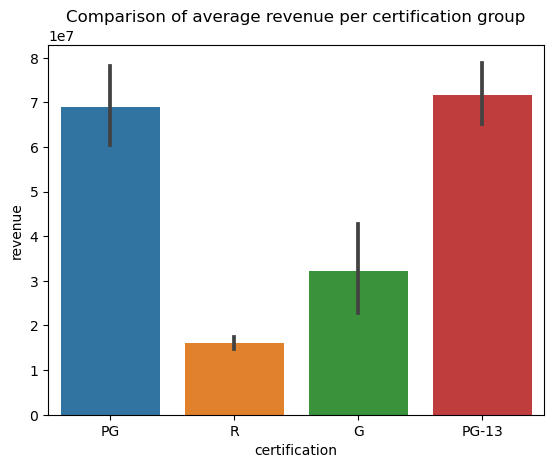

In [64]:
ax = sns.barplot(data=Q1_df_cleaned, x='certification', y='revenue' )
ax.set_title('Comparison of average revenue per certification group')